# Задание

1) Постройте двумерный график вашей любимой функции (если такой нет, полюбите функцию из https://docs.scipy.org/doc/numpy/reference/routines.math.html). Отметьте на этом графике максимальное и минимальное значение

In [1]:
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


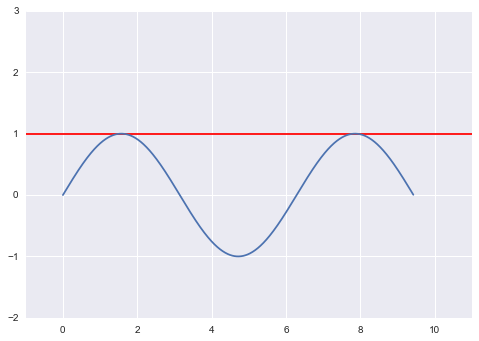

In [2]:
x = np.arange(0, np.pi * 3, 0.01)
y = np.sin(x)
plt.axhline(np.max(y), linestyle='-', color='r')
plt.axis([ -1, 11, -2, 3,])
_ = plt.plot(x, y)

2) Нормализуйте вектор y-координат. Для этого отнимите среднее и поделите на стандартное отклонение. Постройте гистограмму значений получившегося вектора. На гистограмме отметьте среднее и точки $-\sigma$ , $+\sigma$

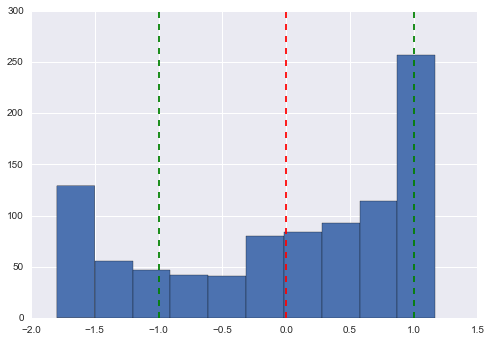

In [3]:
y = np.sin(x) * 5
y -= y.mean()
y /= y.std()
_ = hist(y)
plt.axvline(np.mean(y), linestyle='--', color='r')
plt.axvline(np.mean(y) - np.std(y), linestyle='--', color='g')
plt.axvline(np.mean(y) + np.std(y), linestyle='--', color='g')

3) Николай Иванович играет в игру: он берет из мешка с числами от 1 до 1000 
    случайное число, записывает его на бумажке и возвращает число в мешок. Так он поступает 1000 раз.
    После этого Николай Иванович считает, сколько разных чисел у него на бумажке. Посчитайте и вы ;)
    
Постройте график, где по X будут числа в порядке убывания количества упоминаний на бумажке, а по Y - количество упоминаний. Уместно построить график в логарифмической шкале по X

628


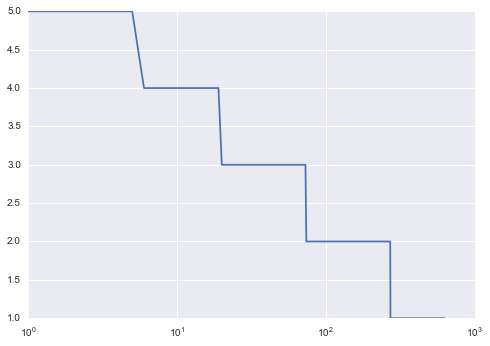

In [7]:
bag = np.arange(1, 1001)
paper = np.random.choice(bag, size=1000)

print len(set(paper))

from collections import defaultdict
uniq_numbers = defaultdict(int)

a = {}
for number in paper:
    uniq_numbers[number] += 1
    
uniq_numbers_counts = sorted(uniq_numbers.values(), reverse=True)
plot(uniq_numbers_counts)
xscale('log')

Проверьте, что выборки i.i.d. (independent, identically distributed).

In [10]:
# Посчитаем корелляцию между двумя бутстрапированными выборками:
np.corrcoef(np.random.choice(bag, size=1000), np.random.choice(bag, size=1000))

array([[ 1.        ,  0.00300843],
       [ 0.00300843,  1.        ]])

In [12]:
# Корреляция 0.003 -т.е. данные не кореллируют

In [13]:
# Посчитаем какой-нибудь непараметрический критерий на одинаковость распределений. 
# Например, подойдет критерий Уилкоксона
import scipy
scipy.stats.wilcoxon(np.random.choice(bag, size=1000), np.random.choice(bag, size=1000))

WilcoxonResult(statistic=233204.5, pvalue=0.069703845556884844)

In [15]:
# pvalue ~ 0.07. Значит, с вероятностью 7% мы можем получить 
# такие же или более значимые различия между выборками, 
# если они сгенерированны из одного распределения

4) постройте трехмерный график вашей любимой функции от 2-х переменных

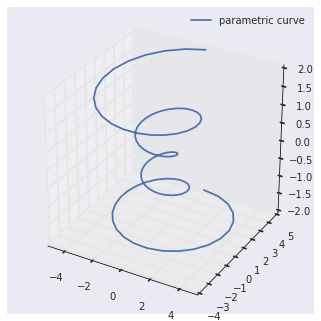

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(1)) 
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()